# AIRLINE CREW SCHEDULING

Import Libraries

In [2]:
!pip install memory_profiler

In [3]:
import itertools
import time
import matplotlib.pyplot as plt
from memory_profiler import memory_usage


Input: Flights & Crew Members

In [4]:
# Sample input flights -> (Flight ID, Start Time, End Time)
flights = [
    ('F1', 9, 11),
    ('F2', 10, 12),
    ('F3', 13, 15),
    ('F4', 11, 13),
    ('F5', 15, 17),
]

# Crew list
crew_members = ['C1', 'C2', 'C3']

REST_TIME = 1  # Mandatory rest period between flights

Constraint Checkers

In [5]:
def is_compatible(existing_flights, new_flight):
    """Check flight overlap and rest time constraints."""
    for _, s, e in existing_flights:
        new_id, new_s, new_e = new_flight

        # Overlap check
        if not (new_s >= e + REST_TIME or new_e + REST_TIME <= s):
            return False
    return True


Backtracking Scheduler

In [6]:
solutions = []
recursive_calls = 0

def assign_flights(index, crew_assignment):
    global recursive_calls
    recursive_calls += 1

    if index == len(flights):
        solutions.append({c: [f[0] for f in crew_assignment[c]] for c in crew_assignment})
        return True

    flight = flights[index]

    for crew in crew_members:
        if is_compatible(crew_assignment[crew], flight):
            crew_assignment[crew].append(flight)

            if assign_flights(index + 1, crew_assignment):
                return True

            crew_assignment[crew].pop()

    return False

def solve():
    crew_assignment = {c: [] for c in crew_members}
    assign_flights(0, crew_assignment)
    return solutions[0] if solutions else None


Run the Scheduler

In [7]:
start = time.time()
recursive_calls = 0

solution = solve()

end = time.time()

print("Final Assignment:")
print(solution)
print("\nTime Taken:", end - start, "seconds")
print("Recursive Calls:", recursive_calls)


Final Assignment:
{'C1': ['F1', 'F3'], 'C2': ['F2', 'F5'], 'C3': ['F4']}

Time Taken: 0.00019431114196777344 seconds
Recursive Calls: 6


Gantt Chart Visualization of Crew Schedule

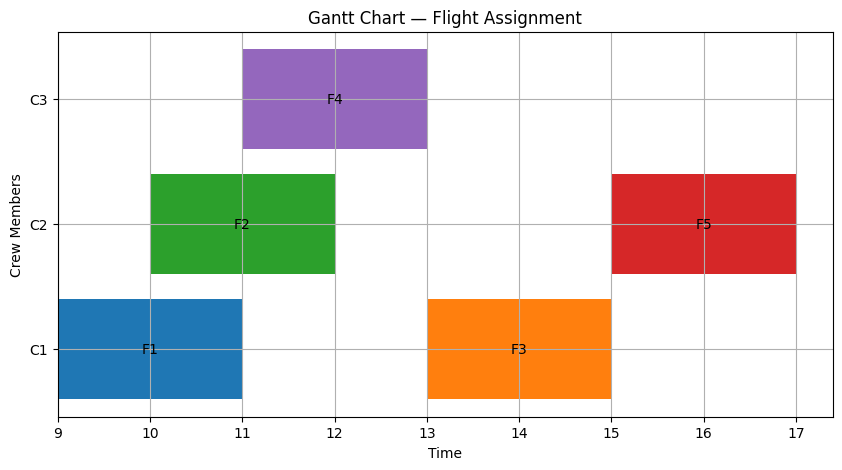

In [8]:
def plot_gantt(solution):
    fig, ax = plt.subplots(figsize=(10, 5))

    y = 0
    for crew, flist in solution.items():
        for f in flist:
            for fid, s, e in flights:
                if f == fid:
                    ax.barh(crew, e - s, left=s)
                    ax.text(s + (e-s)/2, y, fid, va='center', ha='center')
        y += 1

    ax.set_xlabel("Time")
    ax.set_ylabel("Crew Members")
    ax.set_title("Gantt Chart — Flight Assignment")
    plt.grid()
    plt.show()

plot_gantt(solution)


Profiling Execution Time vs Number of Flights

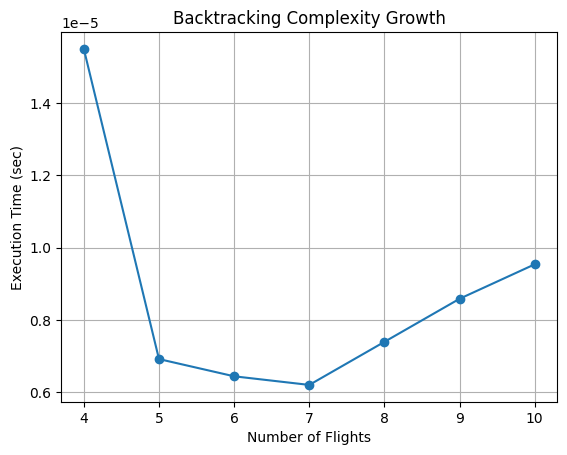

In [9]:
def generate_flights(n):
    flights = []
    start = 9
    for i in range(n):
        flights.append((f"F{i+1}", start, start+1))
        start += 1
    return flights

def profile_scaling():
    times = []
    sizes = list(range(4, 11))

    for n in sizes:
        global flights, solutions, recursive_calls
        flights = generate_flights(n)
        solutions = []
        recursive_calls = 0

        start = time.time()
        solve()
        end = time.time()

        times.append(end - start)

    return sizes, times

sizes, times = profile_scaling()

plt.plot(sizes, times, marker='o')
plt.xlabel("Number of Flights")
plt.ylabel("Execution Time (sec)")
plt.title("Backtracking Complexity Growth")
plt.grid()
plt.show()


Analysis

Why This Problem is NP-Hard?

Crew scheduling resembles graph coloring, interval scheduling, bin-packing, and resource allocation.

There is exponential growth in valid combinations.

Backtracking checks all possible assignments, making worst-case complexity:

Time Complexity:
O(k×2n)
Where:
n = number of flights
k = number of crew members